**Сборный проект 1 - Анализ рынка компьтерных игр**

### Описание проекта

Я выступаю аналитиком в интернет-магазине «Стримчик», который занимается продажей компьютерных игр по всему миру. Из открытых источников можно получить доступ к историческим данным о продажах игр, оценкам пользователей и экспертов, жанрам и платформам (например, Xbox или PlayStation). Моя задача — определить закономерности, влияющие на успех игры. Это поможет сделать ставку на потенциально популярные продукты и спланировать рекламные кампании.

Данные, доступные до 2016 года, позволяют мне представить, что сейчас декабрь 2016 года, и я планирую кампанию на 2017 год. Важно научиться работать с этими данными. Независимо от того, прогнозирую ли я продажи на 2017 год на основе данных 2016 года или 2027 года на основе данных 2026 года, в наборе данных встречается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, которая определяет возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему соответствующую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Цель проекта*** - Выявить определяющие успешность игры закономерности для опредения прибыльного продукта

### Описание данных

- `Name` — название игры;


- `Platform` — платформа;


- `Year_of_Release` — год выпуска;


- `Genre` — жанр игры;


- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);


- `EU_sales` — продажи в Европе (миллионы проданных копий);


- `JP_sales` — продажи в Японии (миллионы проданных копий);


- `Other_sales` — продажи в других странах (миллионы проданных копий);


- `Critic_Score` — оценка критиков (максимум 100);


- `User_Score` — оценка пользователей (максимум 10);


- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



**Данные за 2016 год могут быть неполными**

### План работы



1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя
5. Проверка гипотез
6. Вывод

### Загрузка и изучение данных

In [1]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
games = pd.read_csv('games.csv')
#Открываем файл

In [4]:
games.head()
#Выводим первые 5 строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Отлично, таблица открылась корректно. Уже на данном этапе видны пробемы, но подробнее разберем позже.

In [5]:
games.info()
#Выведем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вижу следующие проблемы в данных:
- `Name`- в данном столбце есть пропуски;


- `Year_of_Release`- в данном стобце есть пропуски, а так же некорретный тип данных float64, должен быть Int64;


- `Genre`-пропуски;


- `Critic_Score`- пропуски;


- `User_Score`- в данном стобце есть пропуски, а так же некорретный тип данных object, должен быть float64;


- `Rating`- пропуски.


Кроме того, наименование всех стобцов некорреткно и не соотвествует общепринятому стилю snake_case

In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Проверяю качество данных

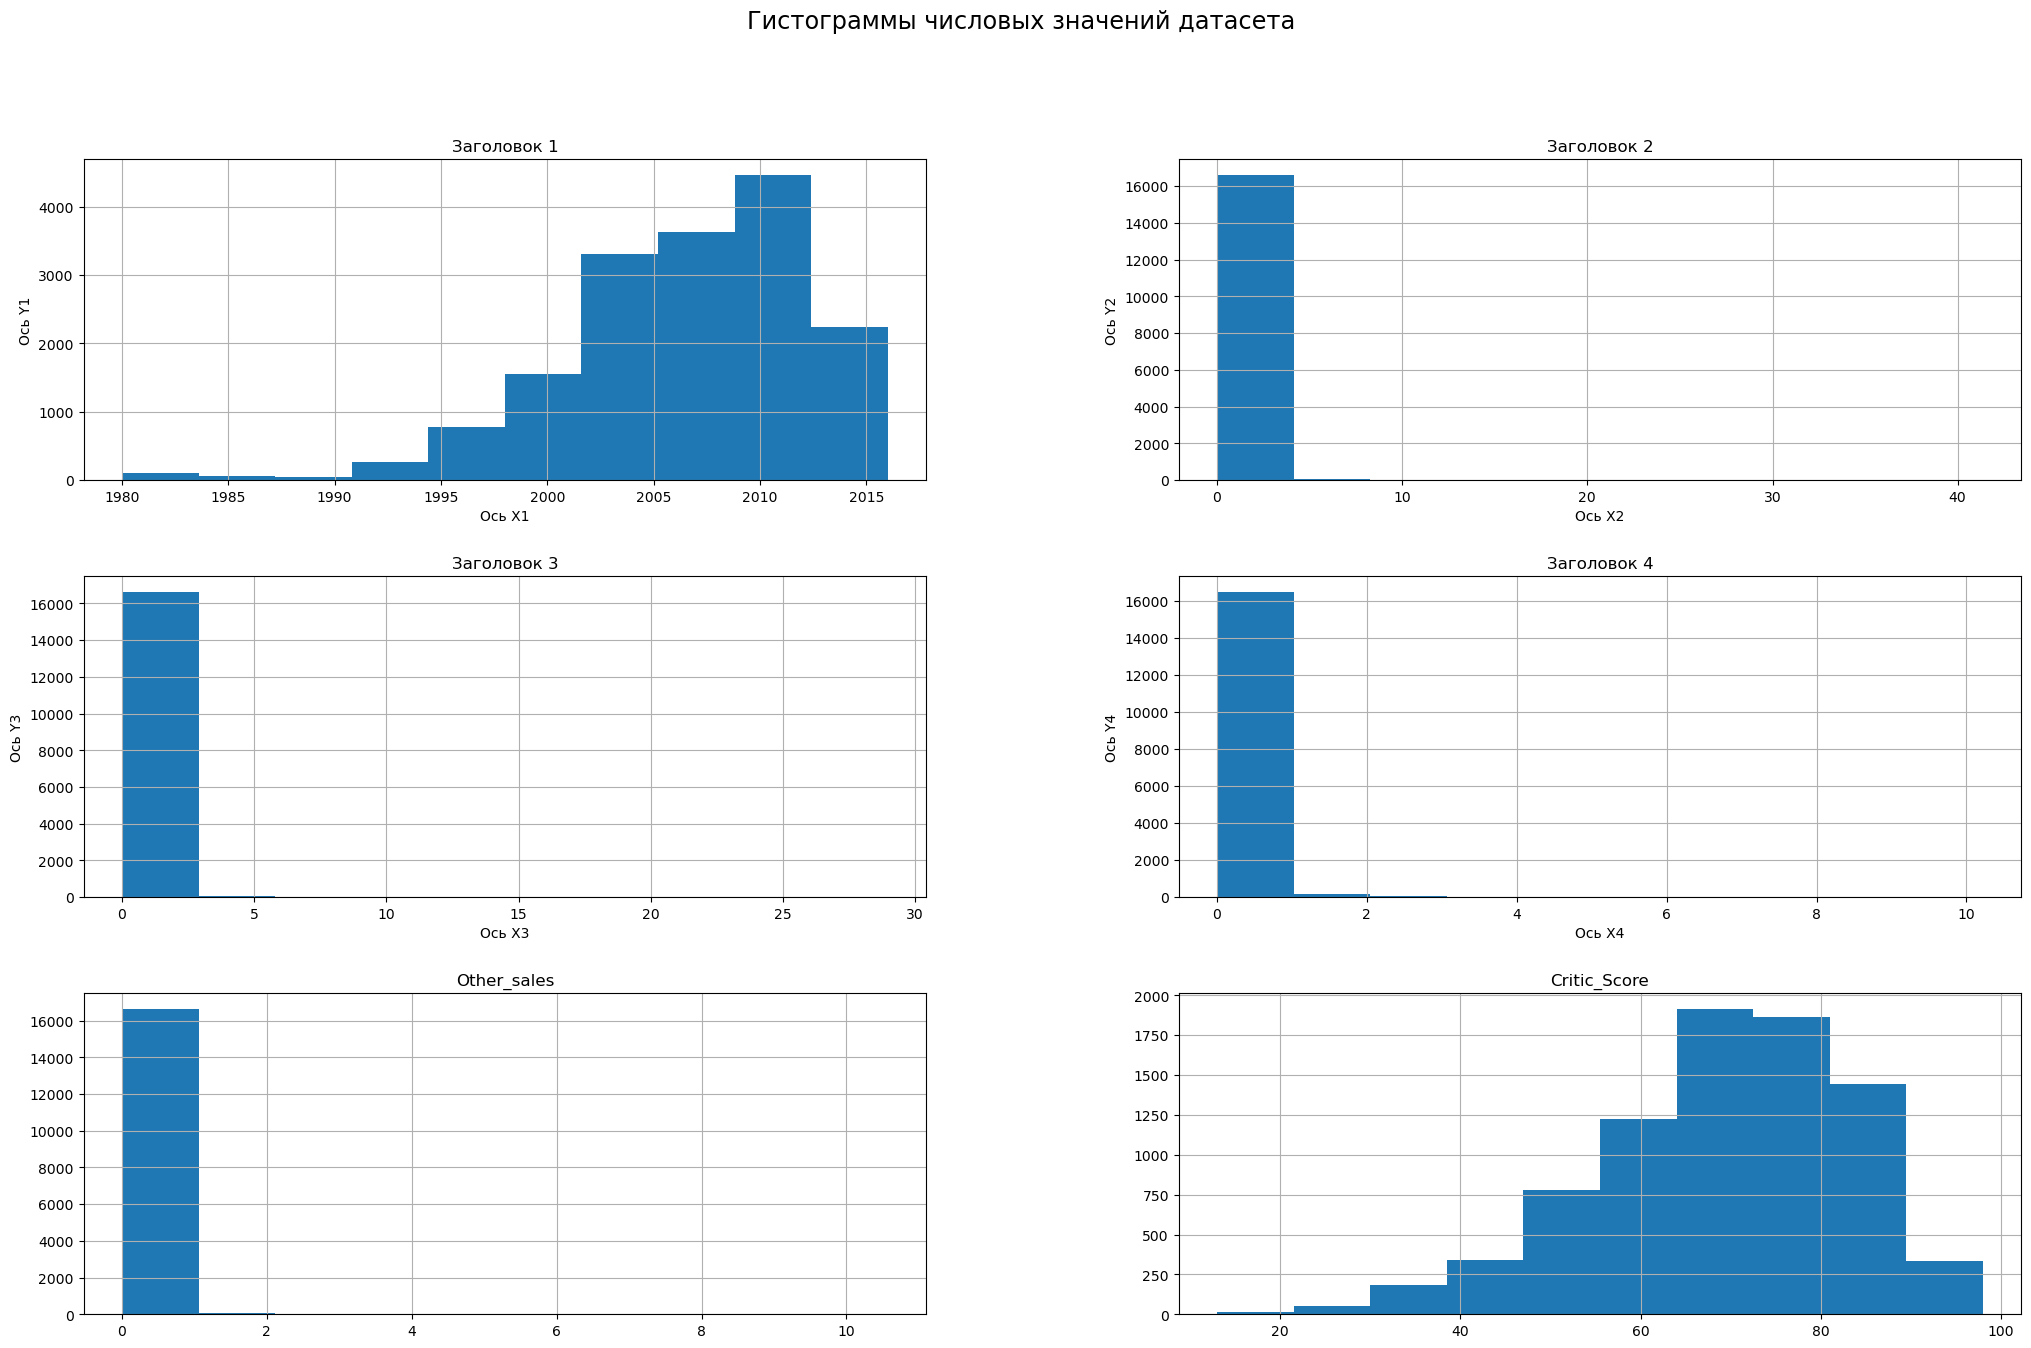

In [7]:

axes = games.hist(figsize = (25,15))
axes[0,0].set_title('Заголовок 1')
axes[0,0].set_xlabel('Ось Х1')
axes[0,0].set_ylabel('Ось Y1')

axes[0,1].set_title('Заголовок 2')
axes[0,1].set_xlabel('Ось Х2')
axes[0,1].set_ylabel('Ось Y2')

axes[1,0].set_title('Заголовок 3')
axes[1,0].set_xlabel('Ось Х3')
axes[1,0].set_ylabel('Ось Y3')

axes[1,1].set_title('Заголовок 4')
axes[1,1].set_xlabel('Ось Х4')
axes[1,1].set_ylabel('Ось Y4')


plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

В целом видно, что данные пригодны для анализа. Но визуализации некоторых стобцов некорректна. Думаю, визуализировать их на этапе исследовательского анализа.

Выведем колличество явных дубликатов:

In [8]:
games.duplicated().sum()

0

Проверка на неявные дубликаты и удаление

In [9]:
dup_games = games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])

In [10]:
dup_games.sum()

2

In [11]:
games = games.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'])

In [12]:
dup_games = games.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])

In [13]:
dup_games.sum()

0

In [14]:
games.isna().sum().sort_values(ascending=False)
#Вывожу количество пропусков

Critic_Score       8577
Rating             6765
User_Score         6700
Year_of_Release     269
Name                  1
Genre                 1
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

***Вывод***

Я ознакомилась с данными. В датафреме всего 16 715 строк и 11 столбцов.

Уже на данном этапе видны проблемы, которые необходимо устранить на этапе предобработке данных:

1. Некорректное наименование столбцов;
2. Наличие пропущенных значений (больше всего пропусков в оценках критиков и пользователей, а также в столбце рейтинга. Не большое колличество пропусков есть в столбце с годом выпуска, кроме того по два пропуска в столбцах наименование и жанр)
3. Некорректные тип данных для некоторых столбцов.

Такие проблемы могли возникнуть как из-за человеческого фактора так и из-за технических причини. Например, могу предположить, что наименование столбцов изначально были придуманы/настроены человеком, который далек от сфера анализа данных. Пропуски могли появиться из-за сбоя при сборе/выгрузке данных. Тоже самое могу сказать и про некорректный тип данных.

В целом, данные пригодны для дальнейшего анализа, но необходима предобратка. Особенно стоит обратить внимание на пропуски - необходимо понимать как и какие заполнять, какие пропуски необходимо удалить, а какие оставить так как они не влияют на анализ.

### Предобработка данных

Начну с корректировке наименования столбцов:

In [15]:
games.columns = games.columns.str.lower()

In [16]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично, теперь все соотвествует snake_case

Приведу данные к корректному типу:

In [18]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

К столбцу user_Score вернусь позднее для обработки tbd

Теперь начнем избавляться от пропусков:

In [19]:
games.isna().sum().sort_values(ascending=False)
#Вывожу количество пропусков

critic_score       8577
rating             6765
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Буду обрабатывать пропуски следующим образом:
1. critic_score - заполню значением -1 так как заменить медианным или среднем значением будет некорректно.
2. rating - заменю пропуски значением unknown, так я не потеряю данные, но буду видеть, что рейтинг не известен.
3. user_score - с этим столбцом буду работать отдельно.
4. year_of_release - пропусков не большое количество и этот столбец понадобиться в анализе, поэтому удалю их.
5. name - удалю пропуски.
6. genre - удалю пропуски.

In [20]:
games['critic_score'].fillna(-1, inplace=True)

In [21]:
games['rating'].fillna('Unknown', inplace=True)

In [22]:
games.dropna(subset=['name', 'genre','year_of_release'], inplace=True)

In [25]:
games.isna().sum().sort_values(ascending=False)
#Проверка

user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
rating                0
dtype: int64

Теперь перейду к предобработке стобца user_score:

In [26]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Согласно информации из интернета tbd аббревиатура фразы To Be Determined - Будет определено. То есть это оценки, которые по каким либо причинам на момент сбора данных неизвестны. Заменю их на NaN, остальные пропуски обработую так же как в critic_score

In [27]:
games['user_score'].replace('tbd', pd.NA, inplace=True)

In [28]:
games['user_score'].fillna(-1, inplace=True)

In [29]:
games.isna().sum().sort_values(ascending=False)
#Проверка

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Отлично, пропусков не осталось. Теперь откорректирую тип данных в user_score

In [30]:
games['user_score'] = pd.to_numeric(games['user_score'])

In [31]:
games.info()
#Повторно вывожу информацию о таблице

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Теперь необходимо добавить столбец с суммарными продажами во всех регионах:

In [32]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [33]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

***Вывод***

Олично на этапе предобработки данных я подготовила их к дальнейшему аналзу:
1. Исправила наименование столбцов;
2. Обработала пропуски;
3. Исправила тип данных;
4. Добавила новый столбец.

Теперь данные полностью пригодны для анализа.

### Исследовательский анализ данных

Необходимо ответить на следующие вопросы:
- Важны ли данные за все периоды? Необходимо посмотреть сколько игр выпускалось в разные годы. 


- За какой характерный срок появляются новые и исчезают старые платформы? Необходимо посмотреть как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 


- Какие платформы лидируют по продажам, растут или падают? Неоообхдимо выбрать несколько потенциально прибыльных платформ.


- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? Нужно посмотреть на общее распределение игр по жанрам


Необходимо сделать:
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.


- Посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.


- Соотнести выводы с продажами игр на других платформах.


Необходимо учитывать:
- Актуальный период определяется в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


- Не учитывать в работе данные за предыдущие годы.

***Начну проводить анализ***

#### Начну с просмотра количества релизов игр по годам:

In [35]:
games_per_year = games.groupby('year_of_release')['name'].count()

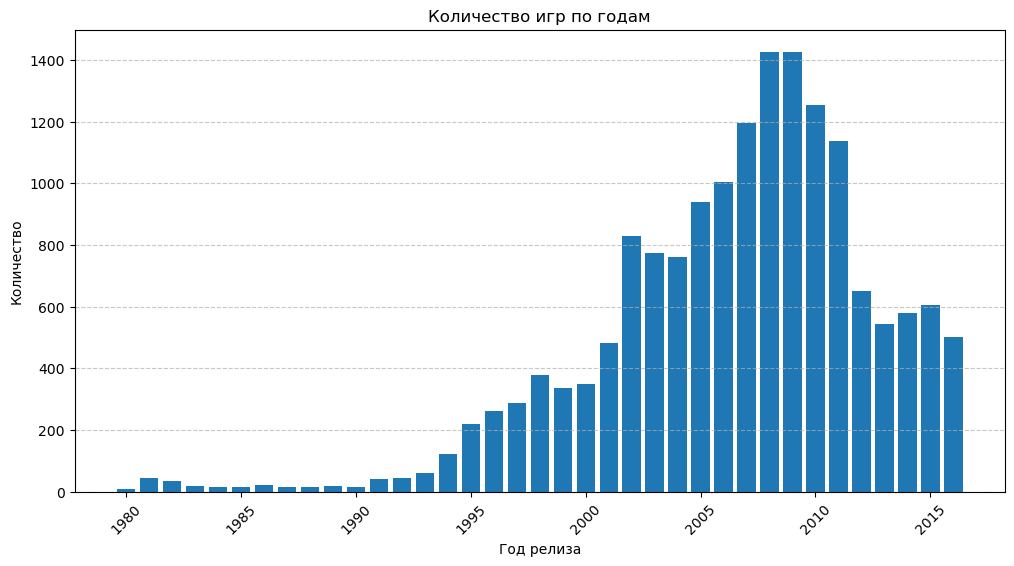

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values,)
plt.title('Количество игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Отвечая на вопрос важны ли данные за все периоды, могу сказать, что данные за весь представленный периоды не нужны. Необходимо анализировать данные отвечающие цели исследования. В данном случае это будет либо актуальный период, либо период роста производства видеоигр, например, с 2002 по 2011 года.

По графику видно как развивался  рынок видеоигр, всек выглядит логично. Как раз таки в начале 2000 технологии становились доступнее и популярнее.

#### Следующим шагом будет изучение характерного срока появления новых и исчезания старых платформ. Необходимо посмотреть как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.

In [37]:
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#Создам переменную с продажами по каждой платформе, отсортированными по убыванию

In [38]:
platform_sales
#Просмотр 

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [39]:
top_platforms = platform_sales.head(10).index.tolist()
#Создам список с топ 10 самых популярных платформ

In [40]:
top_platforms
#Просмотр

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Теперь можно строить распределения по годам:

In [41]:
filtered_top = games[games['platform'].isin(top_platforms)]
#Создаю переменную, которая будет хранить отфильтрованные данные только для топ 10 платформ

In [42]:
filtered_top_per_year = filtered_top.pivot_table(index='year_of_release', 
                                                 columns='platform', 
                                                 values='total_sales', 
                                                 aggfunc='sum'
                                                )
#Создам переменную, которая хранит в себе сводную таблицу, индексами являются годы выпуска, столбцами - платформы, а значениями - суммарные продажи для каждой платформы в каждом году.

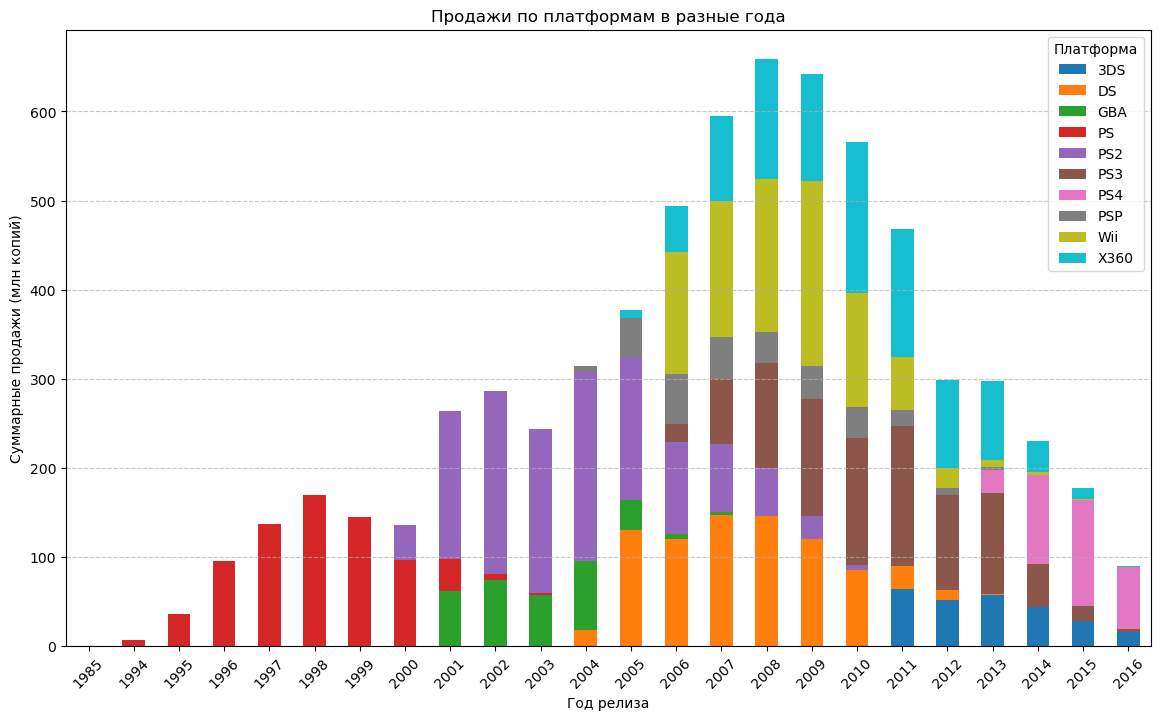

In [43]:
filtered_top_per_year.plot(kind='bar', stacked=True, figsize=(14, 8))
#Использую параметр stacked, чтобы столбцы наложились друг на друга для большей наглядности
plt.title('Продажи по платформам в разные года')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

По диаграмме видно, что в целом все платформы появлялись, "захватывали" рынок и исчезали. Интересно, что платформа PS, появившаяся раньше всех и довольно долго была на рынке - порядка 10 лет, несмотря на появление такого гиганта игровой индустрии как PS2, появшейся в 2000х и существовавашей 11 лет. В целом вся линейка PS популярна и держится по десять лет на рынке. Остальные самостоятельные платформы (не линейки платформ) существуют на рынке по 5-7 лет. 

Так же обращая внимание на линейку PS, можно обратить внимание, что с появление новой платформы, достаточно быстро (в течении нескольких лет) "задавливает" предыдущие поколение консолей, что лично для меня удивительно так как компания sony, выпускающая PS, очень любит эксклюзивные игры, выходящие только на конкретной консоли PS. И только недавно компания разработала систему обратной совместимости, позволяющую играть в старые игры на новых консолях.

#### Теперь нужно определить какие платформы лидируют по продажам, растут или падают. Неоообхдимо выбрать несколько потенциально прибыльных платформ.

На этом шаге уже необходимо определить актуальный период для анализа так как потенциально прибыльные платформы, должны определяться на основе трендов, а не общей тенденции.

Опираясь на свой опыт исследований в ВУЗе, могу сказать, что актуальными данными для исследований являются данные не страше 5 лет. Попробую ориентироваться на этот промежуток, не смотря на то, что согласно графику количества игр по годам именно с 2012 года наблюдаеться спад продаж. 

In [44]:
actual_games = games[games['year_of_release'] >= 2012]
#Создаю таблицу, хранящую только актуальные данные

In [45]:
actual_platforms = actual_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#Нахожу продажи каждой платформы за актуальный период

In [46]:
actual_platforms

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

In [47]:
top_actual_platforms = actual_platforms.head(5).index.tolist()
#Список самых популярных платформ за актуальный период

In [48]:
top_actual_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [49]:
filtered_actual_top = actual_games[actual_games['platform'].isin(top_actual_platforms)]
#Создаю переменную, которая будет хранить отфильтрованные данные только для топ 5 платформ за актуальный период

In [50]:
filtered_actual_top_per_year = filtered_actual_top.pivot_table(index='year_of_release', 
                                                               columns='platform', 
                                                               values='total_sales', 
                                                               aggfunc='sum'
                                                              )

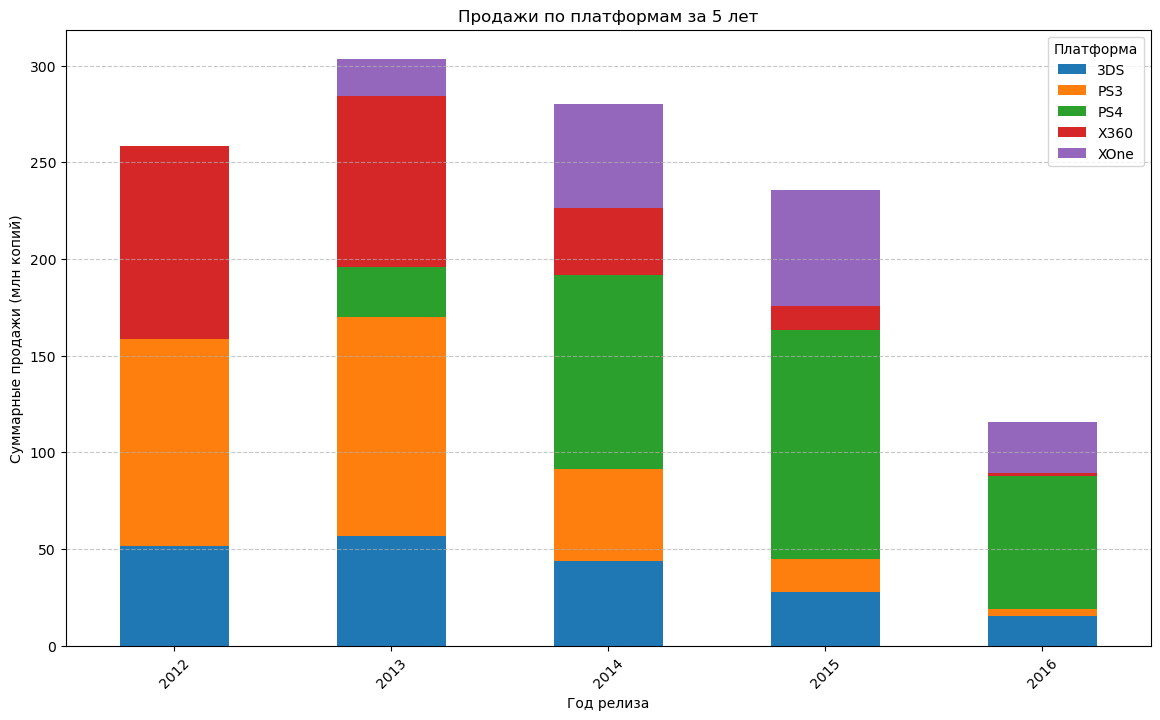

In [51]:
filtered_actual_top_per_year.plot(kind='bar', stacked=True, figsize=(14, 8))
#Использую параметр stacked, чтобы столбцы наложились друг на друга для большей наглядности
plt.title('Продажи по платформам за 5 лет')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(title='Платформа')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Видно, что продажи х360 и PS3 падают. При составлении списка потенциально прибыльных платформ, я бы обратила внимание на 3DS с довольно стабильными продажами за 5 лет, а также на PS4, продажи которой ростут и  xone, продажи, которой хоть и падают, но все еще достаточно высоки. В любом случае, я думаю, что не стоит лишать магазин многообразия платформ, но эти три консоли предположительно будут наиболее прибыльными.

#### Теперь построю "ящик с усами" по глобальным продажам игр в разбивке по платформам. Только актуальный период

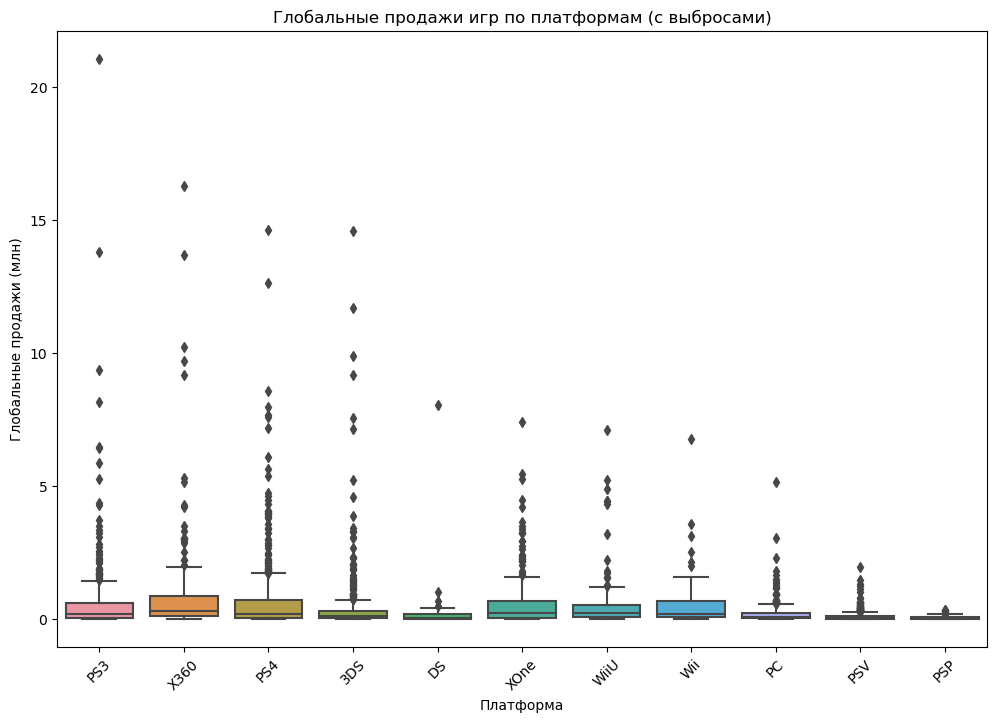

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_games)
plt.title('Глобальные продажи игр по платформам (с выбросами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.show()

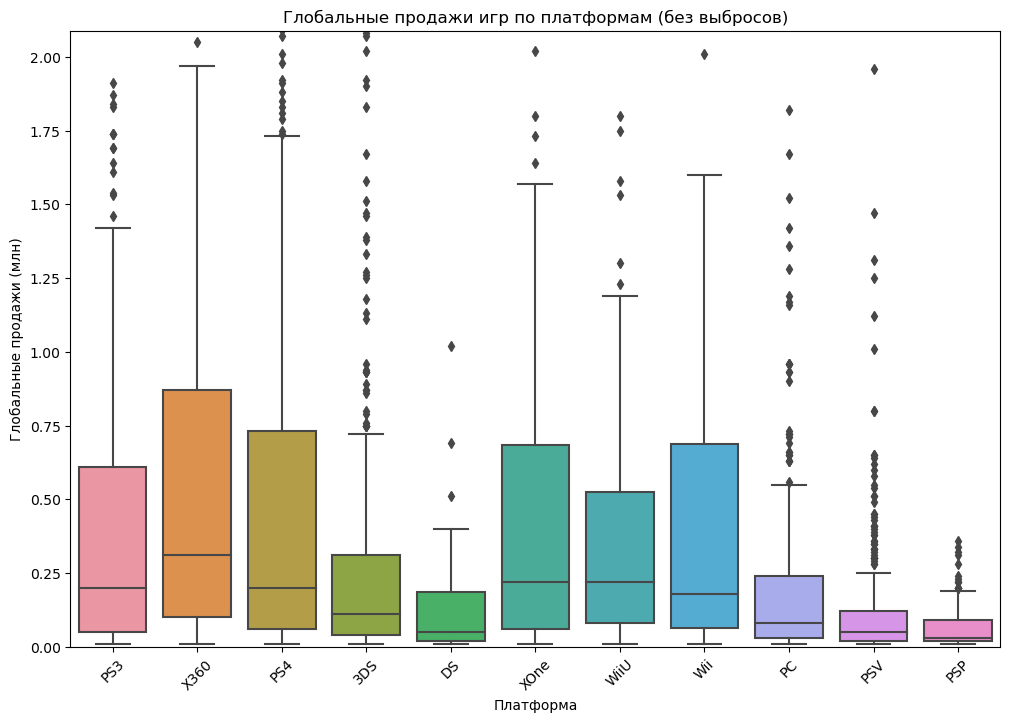

In [53]:
#Масштабированный график
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=actual_games)
plt.title('Глобальные продажи игр по платформам (без выбросов)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (млн)')
plt.xticks(rotation=45)
plt.ylim(0, actual_games['total_sales'].quantile(0.95))  #Ограничение по верхнему квантилю для удаления выбросов, которые больше 95% всех значений
plt.show()

Построила ящик усами по датасету с актуальным периодом по всем платформам actual_games. Сделала два графика: полный со всеми выбросами и масштабированный без выбросов.Из графиков видно, что размахи продаж сильно отличаются на разных платформах, при этом медианные значения в среднем примерно на одном уровне 0,25 млн копий. Большое количество выбросов на определенных платформах говорит о том, что у некоторых игр этих платформ были большие продажи. </b></font><br>

Для создания ящиков с усами я использовала датасет filtered_actual_top, который хранить в себе данные только за актуальный период (> 2012г) по 5 самым популярным платформам. В целом видно, что каждая платформа имеет особено большие продажи. Особенно сильно выделяеться PS3, что не удивительно как мы ранее видели, это довольно популярная платформа, которая долго существует на рынке. 

#### Теперь посмотрим как влияют продажи внутри одной платформы популярные отзывы пользовталей и критиков.

Взаимосвязь для PS4</b></font><br>

In [54]:
ps4_critic_score = actual_games[(actual_games['platform'] == 'PS4') & 
                                (actual_games['critic_score'] != -1)]

In [55]:
ps4_user_score = actual_games[(actual_games['platform'] == 'PS4') & 
                              (actual_games['user_score'] != -1)]

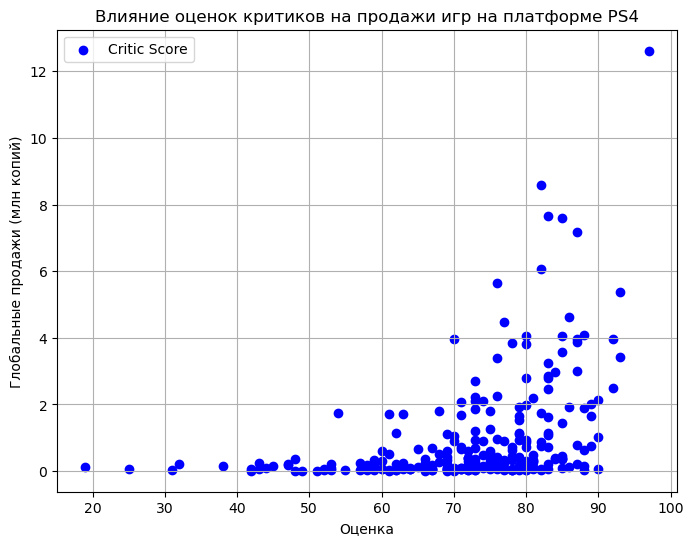

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(ps4_critic_score['critic_score'], ps4_critic_score['total_sales'], color='blue', label='Critic Score')
plt.title('Влияние оценок критиков на продажи игр на платформе PS4')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
ps4_critic_score['critic_score'].corr(ps4_critic_score['total_sales'])

0.40656790206178145

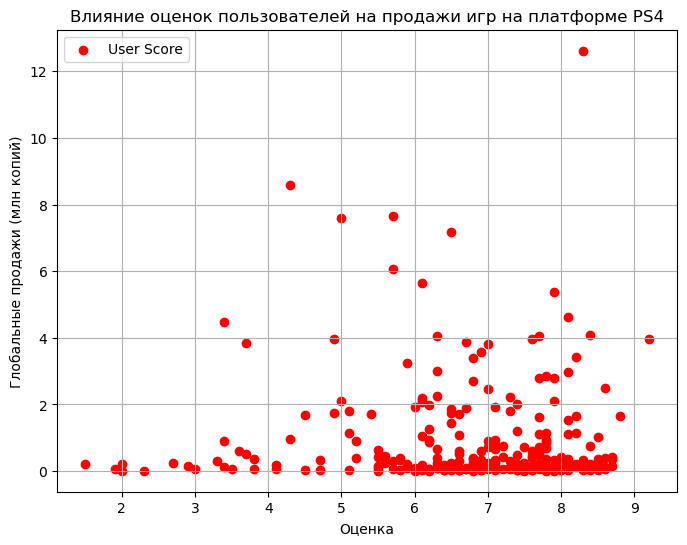

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(ps4_user_score['user_score'], ps4_user_score['total_sales'], color='red', label='User Score')
plt.title('Влияние оценок пользователей на продажи игр на платформе PS4')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
ps4_user_score['user_score'].corr(ps4_user_score['total_sales'])

-0.03195711020455646

По зависимости продаж от оценки критиков можно сказать, что зависимость есть хоть умеренная, а вот по оценкам пользователей вижу отрицательную корреляции, а значит зависимость очень слабая. </b></font><br>

#### Теперь соотнесу эти данные с данными продаж на других консолях. 

##### DS3

In [60]:
ds3_critic_score = actual_games[(actual_games['platform'] == '3DS') & 
                                (actual_games['critic_score'] != -1)]

In [61]:
ds3_user_score = actual_games[(actual_games['platform'] == '3DS') & 
                              (actual_games['user_score'] != -1)]

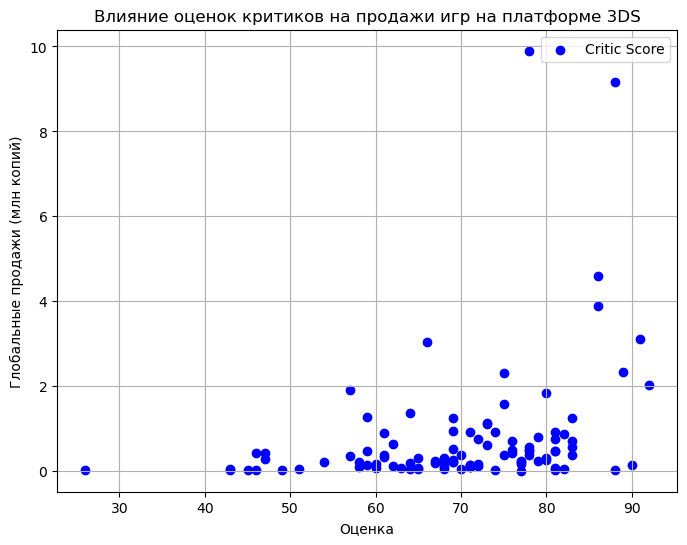

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(ds3_critic_score['critic_score'], ds3_critic_score['total_sales'], color='blue', label='Critic Score')
plt.title('Влияние оценок критиков на продажи игр на платформе 3DS')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
ds3_critic_score['critic_score'].corr(ds3_critic_score['total_sales'])

0.3208028695360786

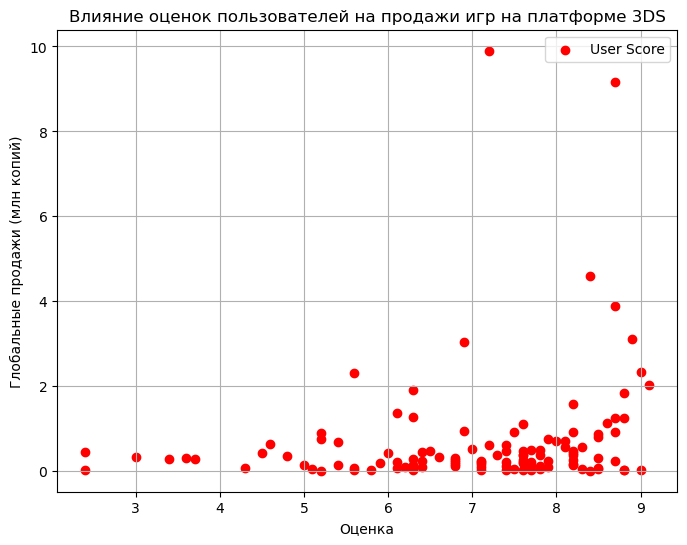

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(ds3_user_score['user_score'], ds3_user_score['total_sales'], color='red', label='User Score')
plt.title('Влияние оценок пользователей на продажи игр на платформе 3DS')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
ds3_user_score['user_score'].corr(ds3_user_score['total_sales'])

0.1975826341103859

Не смотря на то, что у данной платформы саме стабильные корреляция и от оценки критиков и от оценки пользователей очень слабая</b></font><br>

##### PS3

In [66]:
ps3_critic_score = actual_games[(actual_games['platform'] == 'PS3') & 
                                (actual_games['critic_score'] != -1)]

In [67]:
ps3_user_score = actual_games[(actual_games['platform'] == 'PS3') & 
                              (actual_games['user_score'] != -1)]

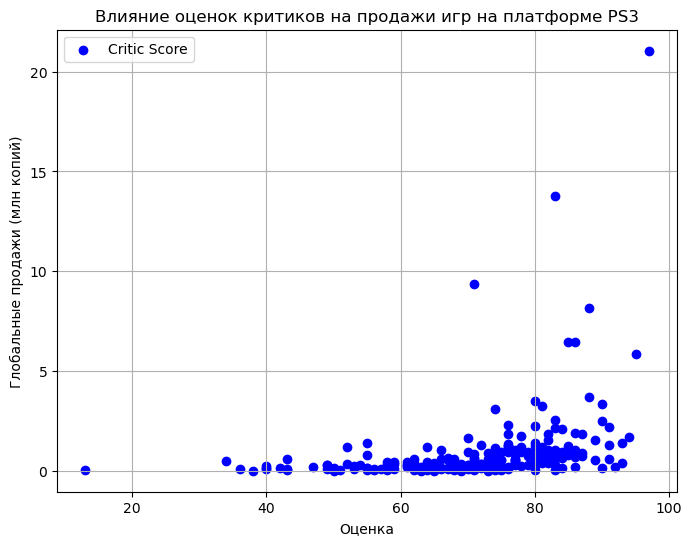

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(ps3_critic_score['critic_score'], ps3_critic_score['total_sales'], color='blue', label='Critic Score')
plt.title('Влияние оценок критиков на продажи игр на платформе PS3')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
ps3_critic_score['critic_score'].corr(ps3_critic_score['total_sales'])

0.33415175755098564

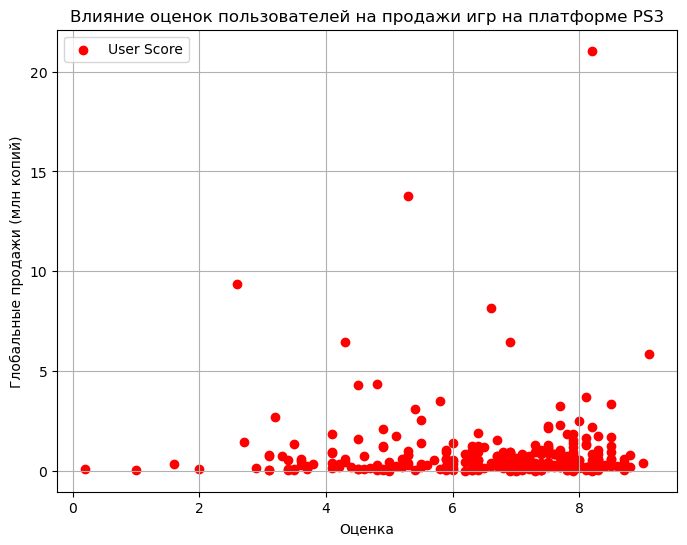

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(ps3_user_score['user_score'], ps3_user_score['total_sales'], color='red', label='User Score')
plt.title('Влияние оценок пользователей на продажи игр на платформе PS3')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
ps3_user_score['user_score'].corr(ps3_user_score['total_sales'])

-0.006205767686051524

Взаимосвязь по оценкам критиков и пользователей слабее чем у платформы PS4, входящая в ту же линейку консолей. ВОзможно это связано с тем, что данная платформа потихоньку уходит с рынка.</b></font><br>

##### x360

In [73]:
x360_critic_score = actual_games[(actual_games['platform'] == 'X360') & 
                                (actual_games['critic_score'] != -1)]

In [74]:
x360_user_score = actual_games[(actual_games['platform'] == 'X360') & 
                              (actual_games['user_score'] != -1)]

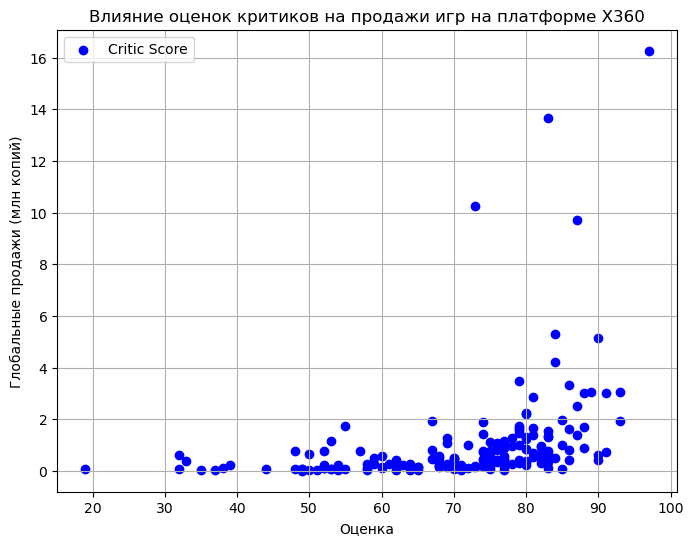

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(x360_critic_score['critic_score'], x360_critic_score['total_sales'], color='blue', label='Critic Score')
plt.title('Влияние оценок критиков на продажи игр на платформе X360')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
x360_critic_score['critic_score'].corr(x360_critic_score['total_sales'])

0.36057348885073387

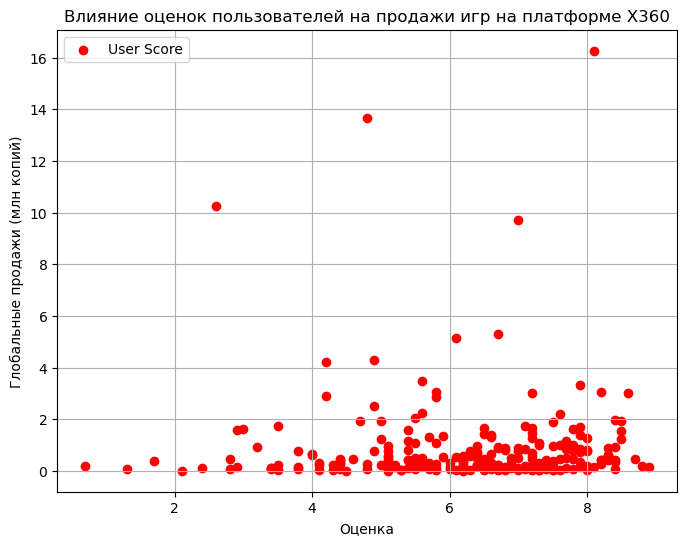

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(x360_user_score['user_score'], x360_user_score['total_sales'], color='red', label='User Score')
plt.title('Влияние оценок пользователей на продажи игр на платформе X360')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
x360_user_score['user_score'].corr(x360_user_score['total_sales'])

0.006163978646213357

Взаимосвязь слабая, но как и других платформ, корреляция по оценкам критиков сильнее чем по оценкам пользователей.

##### xONE

In [80]:
xone_critic_score = actual_games[(actual_games['platform'] == 'XOne') & 
                                (actual_games['critic_score'] != -1)]

In [81]:
xone_user_score = actual_games[(actual_games['platform'] == 'XOne') & 
                              (actual_games['user_score'] != -1)]

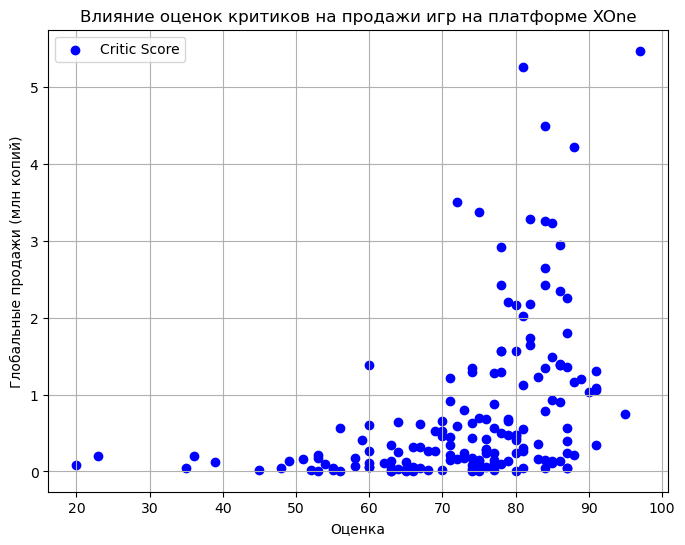

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(xone_critic_score['critic_score'], xone_critic_score['total_sales'], color='blue', label='Critic Score')
plt.title('Влияние оценок критиков на продажи игр на платформе XOne')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
xone_critic_score['critic_score'].corr(xone_critic_score['total_sales'])

0.4169983280084016

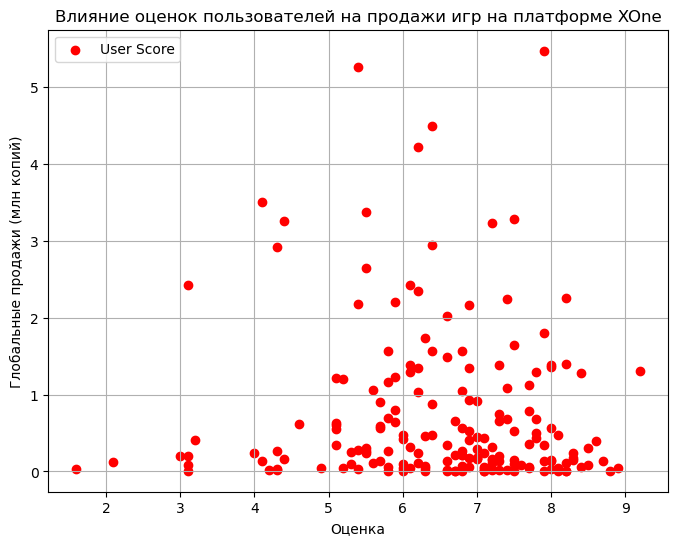

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(xone_user_score['user_score'], xone_user_score['total_sales'], color='red', label='User Score')
plt.title('Влияние оценок пользователей на продажи игр на платформе XOne')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
xone_user_score['user_score'].corr(xone_user_score['total_sales'])

-0.0689250532827942

Взаимосвязь по оценкам критиков сильнее чем у платформы из той же линейки х360, так же и с оценками пользователей, корреялция которых в у данной платформы отрицательная.

В целом по всем платформам из топ-5 взаимосвязь между оценками критиков и пользователей и продажами слабая. Но можно заметить, что взаимосвязь увеличивается для "новых" платформ, а также для локальных платформ (3DS), которая преимущественно продается на рынке японского региона.


#### Теперь посмотрим на самые прибыльные жанры. Выделяются ли жанры с высокими и низкими продажами? Нужно посмотреть на общее распределение игр по жанрам

In [86]:
genre_sales = actual_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
#Сгруппирую данные по жанрам и посчитаем суммарные продажи

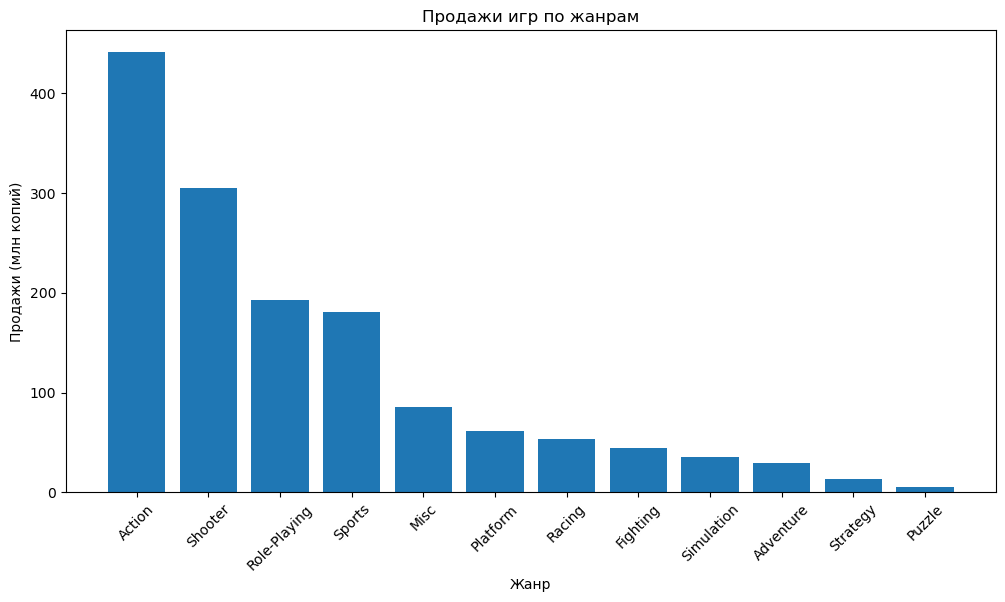

In [87]:
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales.values,)
plt.title('Продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.show()

В целом распределение также не удивляет. Экшн игры и шутеры самые популярные. Следум идут ролевые игры и спортивные (сразу вспоминается FIFA). Нименее популярные игры это пазлы и стратегии. Пазлы не удивительно, обычно в подобные игры играют на телефонах, а в нашей выборке нет данных по мобильным платформам. В стратегии чаще играют на компьтерах, а в нашей выборке, компьтеры оказались не самыми популярными платформами по продажам (возможно это можно объяснить тем, что мы страна пиратов, хаха)

##### Теперь посмотрю на медианные продажи

In [88]:
genre_median_sales = actual_games.groupby('genre')['total_sales'].median().sort_values(ascending=False)

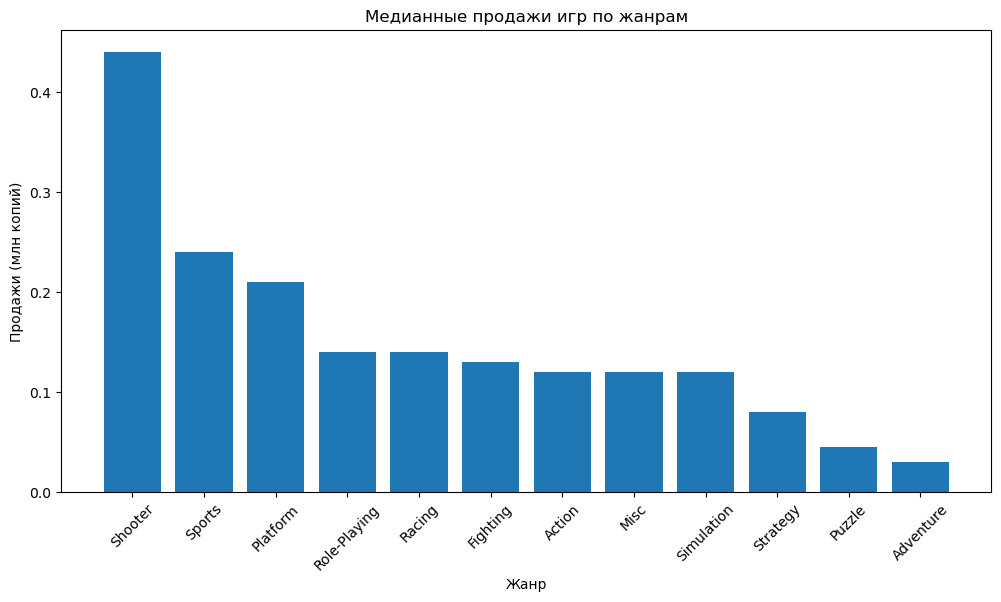

In [89]:
plt.figure(figsize=(12, 6))
plt.bar(genre_median_sales.index, genre_median_sales.values,)
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.show()

По столбчатой диаграмме видно, что по медианным продажам на первом месте оказались шутеры (а по сумарным продажам шетры были на втором месте). На втором месте спорт. А экшн игры по медианным продажам даже не вошли в топ 5 популярных жанров. Для меня столбчатая диаграмма более наглядна. Для чего необходимо строить диаграмму размаха?

****Вывод****

По итогу шага 3 можно сделать вывод, что популярнее всего видео игры были с 2002 года по 2012. Так как именно на это время пришел расцвет игровой индустрии. В целом жизненый циклы всех платформ варьируется в промежутке 5-7 лет, особо популярные платформы такие как PS3, PS4, xone и 3DS держутся на рынке порядка 10 лет. Отзывы пользователей и критиков не влияют на популярность платформ. Объяснения этому кроме как результат рекламных компаний у меня нет. Жаль, что в данных нет результатов работы отдела маркетинга. При реальном исследовании это было бы большим упущением. Самыми популярными жанрами оказались экшны, шутеры и ролевые игры. А самыми не популярными пазлы и стратегии.

### Составление портрета пользователя каждого региона

Необходимо определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.


- Самые популярные жанры (топ-5). Пояснить разницу.


- Определить влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [90]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
#Создам список регионов продаж

In [91]:
#Создам пустой словарь для хранения топ-5 платформ по каждому региону
top_platforms_per_regions = {}

In [92]:
for region in regions:
    platform_sales = actual_games.groupby('platform')[region].sum()
    #Нахожу топ-5 платформ в текущем регионе и добавляю в словарь
    top_platforms_per_regions[region] = platform_sales.sort_values(ascending=False).head(5)

In [93]:
top_platforms_per_regions
#Вывожу результат

{'na_sales': platform
 X360    140.05
 PS4     108.74
 PS3     103.38
 XOne     93.12
 3DS      55.31
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS4     141.09
 PS3     106.85
 X360     74.52
 XOne     51.59
 3DS      42.64
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 3DS     87.79
 PS3     35.29
 PSV     21.04
 PS4     15.96
 WiiU    13.01
 Name: jp_sales, dtype: float64}

По данному словарю видно, что продажи в Японии сильно  отличаються от продаж в Северной Америке и Европе. В Северной Амереке продажи выше по всем платформам. Это в целом не удивительно так как, к примеру, Япония довольно закрытая страна с сильной цензурой, а так же с высоким темпом жизни что может влиять на покупательскую способность граждан (хоть и под покупательской способность обычно подрузомеваются экономические показатели, я имею ввиду, что людям элементарно не когда подобным заниматься). А высокая популярность 3DS в Японии легко объяснить тем, что данную консоль выпускает японский производитель. 

PS4 и PS3 не удивляют своими продажа в Европе и Северной Америки. Популярные консоли, которых производят популярные чаще всего американские игры.

#### Сделаем все тоже самое для жанров.

In [94]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [95]:
top_genre_per_regions = {}

In [96]:
for region in regions:
    genre_sales = actual_games.groupby('genre')[region].sum()
    #Нахожу топ-5 платформ в текущем регионе и добавляю в словарь
    top_genre_per_regions[region] = genre_sales.sort_values(ascending=False).head(5)

In [97]:
top_genre_per_regions

{'na_sales': genre
 Action          177.84
 Shooter         144.77
 Sports           81.53
 Role-Playing     64.00
 Misc             38.19
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action          159.34
 Shooter         113.47
 Sports           69.08
 Role-Playing     48.53
 Racing           27.29
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    65.44
 Action          52.80
 Misc            12.86
 Simulation      10.41
 Fighting         9.44
 Name: jp_sales, dtype: float64}

Опять же результаты не удивительные. В Японии популярны ролевые игры так как постоянно работающие люди пытаются убежать в мир виртуальной реальности. По жанрам Европы и Северной Америки все классически. Популярны экшны и шутеры с примерно одинаковыми продажами в 159 на 177 и 113 на 144 соотвественно. Удивительно, что в Северной Америке популярны игры жанра Misc. Не совсем понятный жанр, кажется, это игры, которые нельзя отнести к какому либо конкретному жанру.

#### А теперь для рейтинга:

In [98]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [99]:
top_rating_per_regions = {}

In [100]:
for region in regions:
    rating_sales = actual_games.groupby('rating')[region].sum()
    #Нахожу топ-5 платформ в текущем регионе и добавляю в словарь
    top_rating_per_regions[region] = rating_sales.sort_values(ascending=False).head(5)

In [101]:
top_rating_per_regions

{'na_sales': rating
 M          231.57
 E          114.37
 Unknown    103.31
 E10+        75.70
 T           66.02
 Name: na_sales, dtype: float64,
 'eu_sales': rating
 M          193.96
 E          113.02
 Unknown     91.50
 E10+        55.37
 T           52.96
 Name: eu_sales, dtype: float64,
 'jp_sales': rating
 Unknown    108.84
 E           28.33
 T           26.02
 M           21.20
 E10+         8.19
 Name: jp_sales, dtype: float64}

Для того, чтобы интерпретировать результаты приведу обозначения организации ESRB:
- «EC» («Early childhood») — «Для детей младшего возраста»

- «E» («Everyone») — «Для всех»

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше», ранее "K-A"

- «T» («Teen») — «Подросткам»

- «M» («Mature») — «Для взрослых»

- «AO» («Adults Only 18+») — «Только для взрослых»

- «RP» («Rating Pending») — «Рейтинг ожидается»

- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

In [102]:
games['rating'].unique()
#А также выведу уникальные значения столбца рейтинг

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

По результатам Северной Америки и Европы самыми популярными рейтингами оказались игры для взрослых (М) и игры для всех (Е). На третьем месте игры с неизветным рейтинго, могу предположить, что это игры с RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+». Но аргументов в пользу этой гипотезы у меня нет. В Японии самым популярным рейтингом оказался неизвестный рейтинг на втором месте игры для всех и игры для подростков, что легко объясняется менталитетом страны.

****Вывод****

По результатам шага 4 можно смело утвеждать, что регион очень сильно влияет на продажи игр и консолей. Менталитет страны и её законы являются очень сильным фактором влияния. И на это обязательно необходимо обращать внимание при планирование на продаж на будующих год. 

### Проверка гипотез

Необходимо проверить следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Необходимо задать самостоятельно пороговое значение alpha.


Необходимо пояснить:
- Как формулировалась нулевая и альтернативная гипотезы;


- Какой критерий применила для проверки гипотез и почему.

#### Гипотеза 1:

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

#### Гипотеза 2:

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.


Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки этих гипотез буду использовать двухсторонний t-тест, который помогает определить значимые различия.

Задам alpha уровень значимости равным **0.05**, что является общепринятым значением в исследованиях

Проверка гипотезы 1 - Если p-value меньше  уровня значимости, то отвергаю нулевую гипотезу и принимаю альтернативную гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверка гипотезы 2 - Если p-value меньше уровня значимости, то отвергаю нулевую гипотезу и принимаю альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различаются.

In [127]:
xbox_one_ratings = actual_games[(actual_games['platform'] == 'XOne') & (actual_games['user_score'] != -1)]['user_score']
pc_ratings = actual_games[(actual_games['platform'] == 'PC') & (actual_games['user_score'] != -1)]['user_score']

In [128]:
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

In [129]:
p_value

0.5535080500643661

Гипотеза 1 - подтврдилась нулевую гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

In [130]:
action_ratings = actual_games[(actual_games['genre'] == 'Action') & (actual_games['user_score'] != -1)]['user_score']
sports_ratings = actual_games[(actual_games['genre'] == 'Sports') & (actual_games['user_score'] != -1)]['user_score']

In [131]:
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings)

In [132]:
p_value

4.8045233804629176e-26

Гипотеза 2 - также подтвердилась нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые

При формулировании нулевой гипотезы я руководствовалась основым принципом формулирования гипотез - вначале выдвигается нулевая гипотеза о том, что различие между генеральными совокупностями равно нулю. Для проверки гипотез использовался двусторонний t-тест поскольку он позволяет оценить статистическую значимость различий между значениями двух независимых выборок

### Общий вывод

В данном проекте были выполнены следующие шаги:
1. Импортирование библиотек - я импортировала все необходимы в работе библиотеки;
2. Знакомство с данными - я ознакомилась с датасетом и выявила проблемы с данными;
4. Проведена предобработка данных - обработаны пропуски, изменен тип данных, добавлен новый столбец, объяснена причина появления проблем в данных;
5. Проведен исследовательский анализ данных - определено колличество выпущенных игр по годам, определены суммарные продажи по платформам, определены наиболее популярные платформы, определен актуальный переиод для исследования, определены и изучены популярные платформы за актуальный период, определены и изучены популярные жанры игр за актуальный период, выявлена взаимосвязь продаж с отзывами критиков и пользователей;
6. Составлен портрет пользователя по разным регионам - выявлены закономерности популярных платформ и региона, популярных жанров и регионов, популярных рейтингов и регионов;
7. Проверены гипотезы о рейтингах двух платформ и двух жанров.

По результатам исследования могу сказать, что на прибыльности какой либо платформы/игры влияют прежде всего регион продажи, а меньше всего отзывы критиков и пользователей. Самыми популярными платформами оказались продукты компании sony и microsoft, которые выпускаються линейками. Для Японского региона также популярна платформа 3DS, которую там же и производят. По рейтингам в идеале необходимо узнать, что скрывается под пропущенными значениями так как в Японии этот рейтинг самй популярный. 
Рекомендации магазину:
Разделять план продаж на регионы (!)

- Для Северной Америки продавать игры на платформах sony в жанре экшн и шутеры с рейтингом для взрослых и для всех

- Для Европы продавать игры на платформах sony и microsoftэкшн и шутеры с рейтингом для взрослых и для всех

- Для Японии продавать игры на платформах 3DS и sony в жанре ролевые и экш с рейтингом для подростков.

Не ориентироваться на отзывы критиков и пользователей, а смотреть на ажиотаж вокруг игры/платформы.